# 1. 의사결정나무(Decision Tree)

In [2]:
import pandas as pd
mushrooms = pd.read_csv(r"C:\Users\BIG3-06\Documents\KDT_Bigdata_7\통계\day4_repeat\mushrooms.csv")
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
# 데이터셋 타입, 쉐입 확인
mushrooms.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [4]:
mushrooms.shape

(8124, 23)

In [7]:
# 결측치 확인
mushrooms[mushrooms.isnull().any(axis=1)]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


In [8]:
mushrooms.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [10]:
# 의사결정트리 모델 fitting
from sklearn.tree import DecisionTreeClassifier
features = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
target = ['class']

# 데이터를 불러오고, 문자열 특성을 원-핫 인코딩으로 변환합니다.
mushrooms_encoded = pd.get_dummies(mushrooms, columns=features)

# 입력 특성과 타깃을 다시 정의합니다.
X_encoded = mushrooms_encoded.drop('class', axis=1)
Y_encoded = mushrooms_encoded['class']

# 모델을 적합합니다.
model_dt_encoded = DecisionTreeClassifier(max_depth=5)
model_dt_encoded.fit(X_encoded, Y_encoded)

print("검증세트 정확도 :", model_dt_encoded.score(X_encoded, Y_encoded))

검증세트 정확도 : 0.9996307237813885


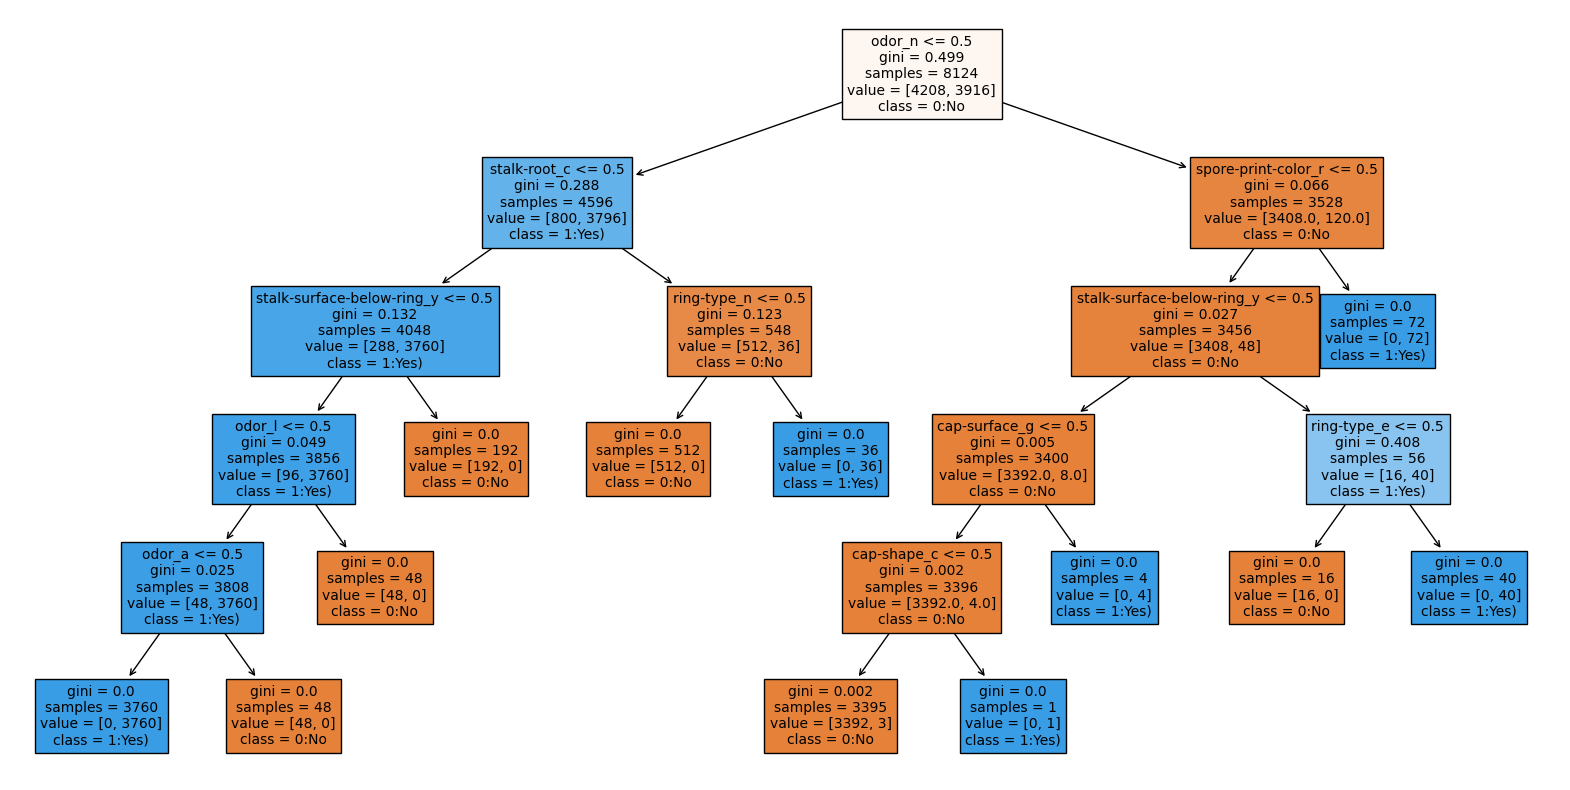

In [11]:
# 3. 의사결정트리 결과를 plot_tree를 활용해 시각화 

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model_dt_encoded, filled=True, feature_names=list(X_encoded.columns), class_names=['0:No', '1:Yes)'], fontsize = 10)
plt.savefig('decision_tree_churn.png', dpi=300)
plt.show()

In [12]:
# 4. 특성중요도(feature importance) 구하기

importances = model_dt_encoded.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
27,odor_n,0.618012
53,stalk-root_c,0.177549
63,stalk-surface-below-ring_y,0.099647
100,spore-print-color_r,0.033863
22,odor_a,0.023401
...,...,...
37,gill-color_b,0.000000
36,gill-size_n,0.000000
35,gill-size_b,0.000000
34,gill-spacing_w,0.000000


# 2. K-평균군집분석(K-means Clustering)

In [14]:
card = pd.read_csv(r"C:\Users\BIG3-06\Documents\KDT_Bigdata_7\통계\day4_repeat\Credit Card Customer Data.csv")
card.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [15]:
card.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [16]:
card.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [19]:
X = card.iloc[:, [3,6]]
X.head().T

,0,1,2,3,4
Total_Credit_Cards,2,3,7,5,6
Total_calls_made,0,9,4,4,3


In [20]:
# features를 스케일링

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.24922476, -1.25153737],
       [-0.78758515,  1.89185881],
       [ 1.05897329,  0.1455276 ],
       ...,
       [ 1.5206129 , -0.90227113],
       [ 2.44389211, -1.25153737],
       [ 1.9822525 , -0.55300488]])

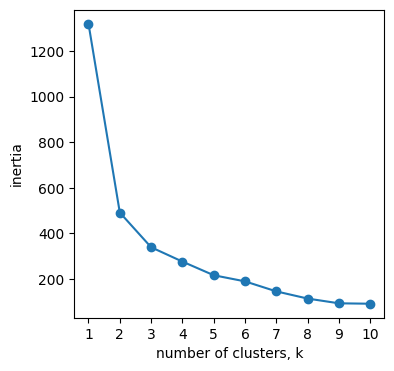

In [22]:
# 3. 적절한 K를 찾기 위한, Scree plot 그리기

from sklearn.cluster import KMeans

ks = range(1,11)
inertias = []

data = X_scaled

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(data)
    inertias.append(model.inertia_)
    
plt.figure(figsize=(4,4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

[4 1 3 7 3 2 4 4 6 2 7 2 1 6 6 1 6 6 1 2 6 1 2 6 1 1 1 1 6 2 6 2 1 6 2 6 1
 6 2 1 2 1 7 6 7 2 6 6 2 2 1 6 1 1 1 6 6 1 1 2 2 1 6 2 1 6 6 2 1 1 1 2 2 2
 1 2 6 6 1 1 1 6 6 2 6 6 2 7 1 2 6 1 6 1 6 1 2 6 1 6 6 1 2 1 1 1 6 6 2 2 7
 1 2 7 2 1 1 2 6 1 2 1 6 1 1 6 2 1 7 2 2 6 2 1 2 2 2 1 1 1 2 6 2 6 2 6 1 6
 1 1 1 6 2 2 2 6 2 1 1 6 1 6 6 1 2 1 2 2 1 2 1 1 6 1 2 6 6 2 1 6 6 1 2 1 7
 6 6 1 6 6 1 6 6 1 6 1 1 1 1 2 1 1 1 1 6 6 6 7 1 1 2 6 6 1 2 2 6 7 2 1 1 6
 2 1 2 7 1 1 0 3 4 3 4 0 3 0 3 3 4 4 4 7 7 0 3 4 4 0 0 0 3 0 7 3 4 7 3 3 0
 7 4 7 4 4 4 0 0 0 0 4 4 3 3 0 7 3 4 7 3 0 0 0 0 4 0 7 4 0 7 0 0 0 7 4 3 3
 4 0 0 3 0 3 4 4 7 3 0 4 7 3 4 0 3 7 0 7 0 7 3 3 0 0 0 4 7 7 7 4 4 3 0 0 0
 4 0 0 4 3 0 0 0 4 3 7 4 0 0 3 7 3 4 0 4 7 0 7 0 4 4 4 0 3 4 4 3 0 3 4 7 3
 7 4 0 4 3 3 4 7 0 3 3 4 3 7 4 0 4 3 4 7 7 4 4 4 0 4 0 4 0 0 3 7 4 4 3 3 0
 4 4 0 4 4 0 0 7 3 7 7 4 0 4 7 0 7 4 3 0 0 7 4 0 3 0 3 4 7 4 0 3 3 7 3 7 3
 0 3 4 4 4 7 0 4 7 7 4 3 3 7 3 3 3 7 4 7 4 4 3 4 7 0 7 0 3 0 7 4 3 3 0 0 0
 0 7 4 4 0 4 0 0 0 4 4 0 

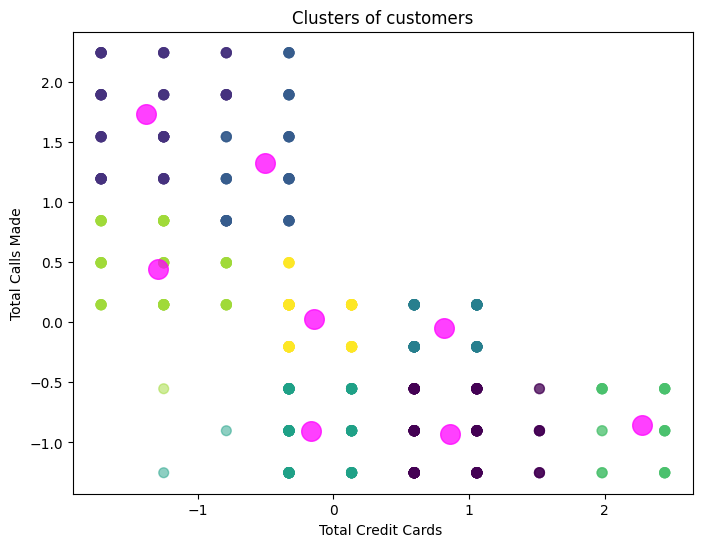

In [30]:
# 4. K-means 클러스터링을 fitting, predict, 클러스터링 결과를 시각화

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = X_scaled
kmeans = KMeans(n_clusters = 8, random_state=2)
kmeans.fit(data)

centers = kmeans.cluster_centers_

y_kmeans = kmeans.predict(data)
print(y_kmeans)

pd.DataFrame(centers)

plt.figure(figsize=(8,6))
plt.scatter(data[:,0], data[:,1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='magenta', s=200, alpha=0.75)

plt.title('Clusters of customers')
plt.xlabel('Total Credit Cards ')
plt.ylabel('Total Calls Made')
plt.show()